/Users/Andy/opt/miniconda3/lib/python3.9/site-packages/scipy/__init__.py:146: UserWarning: A NumPy version >=1.16.5 and <1.23.0 is required for this version of SciPy (detected version 1.24.3
  warnings.warn(f"A NumPy version >={np_minversion} and <{np_maxversion}"


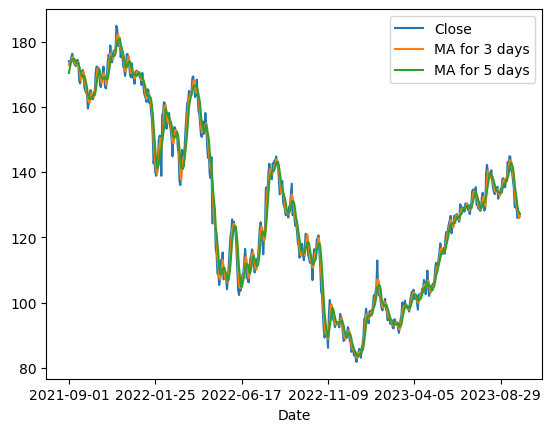

In [1]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt

import datetime

def str_to_date(s):
    split = s.split('-')
    year, month, day = int(split[0]), int(split[1]), int(split[2])
    
    return datetime.datetime(year, month, day)

data = pd.read_csv('AMZN.csv')
data = data[['Date', 'Close']]
data['Date'].apply(str_to_date)
data.index = data.pop('Date')


ma_day=[3,5,10,20,50]

for ma in ma_day:
    column_name = f"MA for {ma} days"
    data[column_name]=data['Close'].rolling(ma).mean()
# data = window_data(data.loc['2021-05-26': , :])
data_2021=data.loc['2021-09-01': , :]

# data_2021[['Close', 'MA for 10 days', 'MA for 20 days', 'MA for 50 days']].plot()
data_2021[['Close','MA for 3 days', 'MA for 5 days']].plot()

def data_to_date_X_y(df):
    dates = df.index
    
    arr = df.to_numpy()
    
    
    X = arr[:, 0:-1].reshape((len(dates), arr[:, 0:-1].shape[1], 1))
    y = arr[:, -1]
    
    return dates, X.astype(np.float32), y.astype(np.float32)

data_10 = data_2021.filter(['MA for 5 days']).values

from sklearn.preprocessing import MinMaxScaler

scaler = MinMaxScaler(feature_range=(0,1))
scaled_data = scaler.fit_transform(data_10)

# training data set 
p8 = int(np.ceil( len(data_10) * .60 ))
p9 = int(np.ceil( len(data_10) * .80 ))

train_data = scaled_data[0:p8, :]
val_data = scaled_data[p8:p9, :]
x_train = []
y_train = []
x_val = []
y_val = []

for i in range(60, len(train_data)):
    x_train.append(train_data[i-60:i, 0])
    y_train.append(train_data[i, 0])
    
for i in range(60, len(val_data)):
    x_val.append(val_data[i-60:i, 0])
    y_val.append(val_data[i, 0])
        

x_train, y_train = np.array(x_train), np.array(y_train)
x_train = np.reshape(x_train, (x_train.shape[0], x_train.shape[1], 1))

x_val, y_val = np.array(x_val), np.array(y_val)
x_val = np.reshape(x_val, (x_val.shape[0], x_val.shape[1], 1))

In [4]:
from keras.models import Sequential
from keras.layers import Dense, LSTM
from keras.callbacks import EarlyStopping
from keras.optimizers import Adam
from keras import regularizers

# L2 regularization parameter
l2_lambda = 0.001

model = Sequential()
model.add(LSTM(64, return_sequences=True, input_shape= (x_train.shape[1], 1), kernel_regularizer=regularizers.l2(l2_lambda)))
model.add(LSTM(64, return_sequences=False, kernel_regularizer=regularizers.l2(l2_lambda)))
model.add(Dense(25, kernel_regularizer=regularizers.l2(l2_lambda)))
model.add(Dense(1))

optimizer = Adam(learning_rate=0.001)
model.compile(optimizer=optimizer, loss='mean_squared_error')
# Early stopping callback
early_stop = EarlyStopping(monitor='val_loss', patience=5, restore_best_weights=True)

model.fit(x_train, y_train, batch_size=64, epochs=200, validation_data=(x_val, y_val),callbacks=[early_stop])

Epoch 1/200
4/4 [==============================] - 2s 147ms/step - loss: 0.3604 - val_loss: 0.1362
Epoch 2/200
4/4 [==============================] - 0s 44ms/step - loss: 0.1750 - val_loss: 0.1557
Epoch 3/200
4/4 [==============================] - 0s 46ms/step - loss: 0.1577 - val_loss: 0.1298
Epoch 4/200
4/4 [==============================] - 0s 45ms/step - loss: 0.1424 - val_loss: 0.1221
Epoch 5/200
4/4 [==============================] - 0s 44ms/step - loss: 0.1413 - val_loss: 0.1190
Epoch 6/200
4/4 [==============================] - 0s 47ms/step - loss: 0.1270 - val_loss: 0.1197
Epoch 7/200
4/4 [==============================] - 0s 45ms/step - loss: 0.1223 - val_loss: 0.1177
Epoch 8/200
4/4 [==============================] - 0s 46ms/step - loss: 0.1174 - val_loss: 0.1088
Epoch 9/200
4/4 [==============================] - 0s 45ms/step - loss: 0.1105 - val_loss: 0.1015
Epoch 10/200
4/4 [==============================] - 0s 43ms/step - loss: 0.1073 - val_loss: 0.0970
Epoch 11/200
4/4 [

Epoch 84/200
4/4 [==============================] - 0s 48ms/step - loss: 0.0255 - val_loss: 0.0225
Epoch 85/200
4/4 [==============================] - 0s 49ms/step - loss: 0.0251 - val_loss: 0.0223
Epoch 86/200
4/4 [==============================] - 0s 50ms/step - loss: 0.0248 - val_loss: 0.0219
Epoch 87/200
4/4 [==============================] - 0s 50ms/step - loss: 0.0245 - val_loss: 0.0218
Epoch 88/200
4/4 [==============================] - 0s 49ms/step - loss: 0.0242 - val_loss: 0.0214
Epoch 89/200
4/4 [==============================] - 0s 50ms/step - loss: 0.0239 - val_loss: 0.0212
Epoch 90/200
4/4 [==============================] - 0s 49ms/step - loss: 0.0236 - val_loss: 0.0210
Epoch 91/200
4/4 [==============================] - 0s 51ms/step - loss: 0.0234 - val_loss: 0.0206
Epoch 92/200
4/4 [==============================] - 0s 50ms/step - loss: 0.0233 - val_loss: 0.0204
Epoch 93/200
4/4 [==============================] - 0s 51ms/step - loss: 0.0228 - val_loss: 0.0202
Epoch 94/2

4/4 [==============================] - 0s 50ms/step - loss: 0.0108 - val_loss: 0.0095
Epoch 167/200
4/4 [==============================] - 0s 50ms/step - loss: 0.0106 - val_loss: 0.0095
Epoch 168/200
4/4 [==============================] - 0s 53ms/step - loss: 0.0104 - val_loss: 0.0093
Epoch 169/200
4/4 [==============================] - 0s 48ms/step - loss: 0.0104 - val_loss: 0.0092
Epoch 170/200
4/4 [==============================] - 0s 50ms/step - loss: 0.0102 - val_loss: 0.0091
Epoch 171/200
4/4 [==============================] - 0s 51ms/step - loss: 0.0100 - val_loss: 0.0091
Epoch 172/200
4/4 [==============================] - 0s 53ms/step - loss: 0.0102 - val_loss: 0.0089
Epoch 173/200
4/4 [==============================] - 0s 50ms/step - loss: 0.0104 - val_loss: 0.0089
Epoch 174/200
4/4 [==============================] - 0s 51ms/step - loss: 0.0101 - val_loss: 0.0090
Epoch 175/200
4/4 [==============================] - 0s 51ms/step - loss: 0.0099 - val_loss: 0.0088
Epoch 176/200


In [15]:
test_data = scaled_data[p9 - 60: , :]

x_test = []
y_test = data_10[p9:, :]
for i in range(60, len(test_data)):
    x_test.append(test_data[i-60:i, 0])

x_test = np.array(x_test)

x_test = np.reshape(x_test, (x_test.shape[0], x_test.shape[1], 1 ))

# models predicted price values 
predictions = model.predict(x_test)
predictions = scaler.inverse_transform(predictions)

# root mean squared error
rmse = np.sqrt(np.mean(((predictions - y_test) ** 2)))
rmse
acc =1.96 * rmse #95% confident that the error lies within the range
print(rmse)

from sklearn.metrics import r2_score

r2 = r2_score(y_test, predictions)
print(f"R-squared: {r2:.4f}")

4/4 [==============================] - 0s 6ms/step
2.227021918406397
R-squared: 0.9471


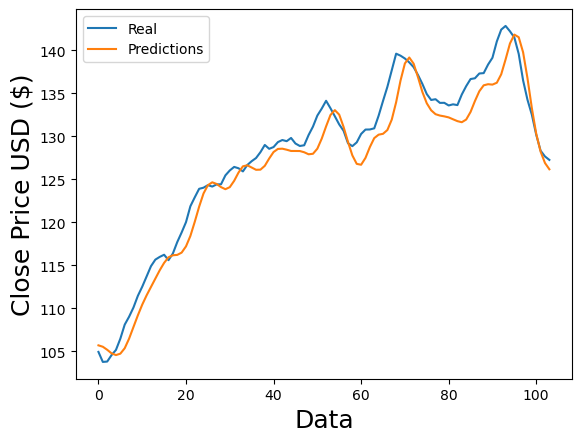

In [14]:
plt.xlabel('Data', fontsize=18)
plt.ylabel('Close Price USD ($)', fontsize=18)
plt.plot(y_test)
plt.plot(predictions)
plt.legend(['Real','Predictions'])
plt.show()

In [12]:
plt.figure(figsize=(12, 6))
plt.plot(scaled_data.iloc[int(0.8*len(data_2021)):], label="True")
plt.plot(scaled_data.iloc[int(0.8*len(data_2021)):].index, predictions, label="Predictions", color='red')
plt.title('Amazon Stock Price Prediction')
plt.xlabel('Date')
plt.ylabel('Stock Price')
plt.legend()
plt.show()

AttributeError: 'numpy.ndarray' object has no attribute 'iloc'

<Figure size 1200x600 with 0 Axes>